<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/develop/DataMining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TESTO DEL PROGETTO**

Task 1.1: Data Understanding

Explore the dataset with the analytical tools studied and write a concise “data understanding”
report assessing data quality, the distribution of the variables and the pairwise correlations.
Subtasks of DU:

1. Data semantics for each feature that is not described above and the new one defined
by the team
2. Distribution of the variables and statistics
3. Assessing data quality (missing values, outliers, duplicated records, errors)
4. Variables transformations
5. Pairwise correlations and eventual elimination of redundant variables



DALLE SLIDE DATA UNDERSTANDING: [slide](http://didawiki.cli.di.unipi.it/lib/exe/fetch.php/magistraleinformatica/dmi/2-data_understanding.pdf)

Find answers to the questions
1. What kind of attributes do we have?
2. How is the data quality?
3. Does a visualiza4on helps?
4. Are attributes correlated?
5. What about outliers?
6. How are missing values handled?
7. Do we need to extract other attributes



Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for
describing the user and his/her behavior derived from the information collected from the
tweets.
Examples of indicators to be computed are:
1. How many tweets were published by the user?
2. How many tweets are published by the user in a given period of time?
3. Total number of tweets
4. Total number of likes and comments
5. Ratio between the number of tweets and the number of likes
6. Entropy of the user
7. Average length of the tweets per user
8. Average number of special characters in the tweets per user

DALLE SLIDE DATA PREPARATION:[slide](http://didawiki.cli.di.unipi.it/lib/exe/fetch.php/magistraleinformatica/dmi/3-data_preparation.pdf)

0. select attributes,
1. reduce the data dimension,
2. select records,
3. treat missing values,
4. treat outliers,
5. integrate, unify and transform data
7. improve data quality

## Downloading the dataset and load data into dataframe

In [1]:
users_fileid = "16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR"
tweets_fileid = "1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe"

!gdown --id $users_fileid
!gdown --id $tweets_fileid

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR
To: /content/users.csv
100% 641k/641k [00:00<00:00, 108MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe
To: /content/tweets.csv
100% 1.86G/1.86G [00:12<00:00, 149MB/s]


In [2]:
import pandas as pd

# se il pc non ve lo regge impostate il numero di righe e lavorateci su <3
max_rows = 0
 
if max_rows != 0:
  tweets_df = pd.read_csv("./tweets.csv", nrows=max_rows)
  users_df = pd.read_csv("./users.csv")
else:
  tweets_df = pd.read_csv("./tweets.csv")
  users_df = pd.read_csv("./users.csv")


**Data Understanding**

---



## Data Semantics

USERS CSV

1. User Id: a unique identifier of the user
2. Statues Count: the count of the tweets made by the user at the moment of data
crawling
3. Lang: the user’s language selected
4. Created at: the timestamp in which the profile was created
5. Label: a binary variable that indicates if a user is a bot or a genuine user

TWEETS CSV

1. ID: a unique identifier for the tweet
2. User Id: a unique identifier for the user who wrote the tweet
3. Retweet count: number of retweets for the tweet in analysis
4. Reply count: number of reply for the tweet in analysis
5. Favorite count: number of favorites (likes) received by the tweet
6. Num hashtags: number of hashtags used in the tweet
7. Num urls: number of urls in the tweet
8. Num mentions: number of mentions in the tweet
9. Created at: when the tweet was created
10. Text: the text of the tweet

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


In [4]:
tweets_df.head(5)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [5]:
print(len(tweets_df))

13664696


In [6]:
print(len(users_df))

11508


In [7]:
tweets_df.isna().any()

id                 True
user_id            True
retweet_count      True
reply_count        True
favorite_count     True
num_hashtags       True
num_urls           True
num_mentions       True
created_at        False
text               True
dtype: bool

In [8]:
from pandas import DataFrame

def nan_unique_count(df: DataFrame, dataframe_name):
  #print distinct value for each column of tweets_df
  for col in df.columns:
    print(f"column: {col} \tunique values: {len(df[col].unique())}")
    print(f"column: {col} \tNaN: {df[col].isna().sum()}")

In [9]:
nan_unique_count(tweets_df, "tweets_df")

column: id 	unique values: 11672136
column: id 	NaN: 2
column: user_id 	unique values: 222286
column: user_id 	NaN: 217283
column: retweet_count 	unique values: 229168
column: retweet_count 	NaN: 437134
column: reply_count 	unique values: 158620
column: reply_count 	NaN: 647878
column: favorite_count 	unique values: 158764
column: favorite_count 	NaN: 647542
column: num_hashtags 	unique values: 104780
column: num_hashtags 	NaN: 1057524
column: num_urls 	unique values: 157146
column: num_urls 	NaN: 648623
column: num_mentions 	unique values: 131539
column: num_mentions 	NaN: 854165
column: created_at 	unique values: 8127084
column: created_at 	NaN: 0
column: text 	unique values: 6778479
column: text 	NaN: 537721


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [11]:
users_df.isna().any()

id                False
name               True
lang              False
bot               False
created_at        False
statuses_count     True
dtype: bool

In [12]:
nan_unique_count(users_df, "users_df")

column: id 	unique values: 11508
column: id 	NaN: 0
column: name 	unique values: 11361
column: name 	NaN: 1
column: lang 	unique values: 26
column: lang 	NaN: 0
column: bot 	unique values: 2
column: bot 	NaN: 0
column: created_at 	unique values: 11423
column: created_at 	NaN: 0
column: statuses_count 	unique values: 3837
column: statuses_count 	NaN: 399


In [13]:
users_df.head(5)

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


As shown above there are some null values inside the two dataframes. Furthermore, the type of the column values is 'object' even for columns that should only have numeric values such as 'id', 'user_id' and others. This means that some values in the respective columns are not integers but strings or something else. The data is therefore to be cleaned.

**Data Preparation**
---



## Data Quality & Data Cleaning

commento: nelle slide di data understanding mette il data cleaning nella fase di data undestanding, nelle slide di data preparation lo rimette come treat missing values and outliers. Per ora lascio data quality and cleaning sotto data preparation, nel caso si sposta su nel data undestanding

In this part we check for duplicates, missing values and outliers. SCRIVERE ALTRO

In [14]:
# duplicates

def find_and_remove_duplicates(df: DataFrame, dataframe_name):
    original_lenght = len(df)
    print(f"Len of {dataframe_name} before cleaning: {original_lenght}")

    df.drop_duplicates(inplace=True)
    new_lenght = len(df)

    count = original_lenght - new_lenght
    print(f"duplicates removed from {dataframe_name} file: \t{count}")
    print(f"Len of {dataframe_name} after cleaning: {new_lenght}")
    print(f"We have {round((count/original_lenght),4)}% of duplicates in {dataframe_name} file\n")

find_and_remove_duplicates(tweets_df, "tweets_df")
find_and_remove_duplicates(users_df, "users_df")

Len of tweets_df before cleaning: 13664696
duplicates removed from tweets_df file: 	1952099
Len of tweets_df after cleaning: 11712597
We have 0.1429% of duplicates in tweets_df file

Len of users_df before cleaning: 11508
duplicates removed from users_df file: 	0
Len of users_df after cleaning: 11508
We have 0.0% of duplicates in users_df file



In [15]:
# assign correct type to attribute

# covert tweets_df columns from object to numeric. 
# If a value can't be converted to integer a NaN is inserted

columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    tweets_df[col]=pd.to_numeric(tweets_df[col], errors='coerce', downcast='integer')

tweets_df["created_at"]=pd.to_datetime(tweets_df["created_at"], errors='coerce', yearfirst=True)

users_df["created_at"]=pd.to_datetime(users_df["created_at"], errors='coerce', yearfirst=True)

In [16]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712597 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 983.0+ MB


In [17]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  int64         
 1   name            11507 non-null  object        
 2   lang            11508 non-null  object        
 3   bot             11508 non-null  int64         
 4   created_at      11508 non-null  datetime64[ns]
 5   statuses_count  11109 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 629.3+ KB


In [18]:
# Remove NaN
#nan_unique_count(tweets_df, "tweets_df")
tweets_df.dropna(subset=['text'], inplace=True)
#nan_unique_count(tweets_df, "tweets_df")

Per evitare di eliminare record importanti dal dataset decidiamo di sostituire valori NaN degli attributi che rappresentano dei contatori con valori negativi non presenti del dataset

In [19]:
#substitute NaN values
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
  print(f"{col} max value: {tweets_df[col].max()}")
  print(f"{col} min value: {tweets_df[col].min()}")

retweet_count max value: inf
retweet_count min value: 0.0
reply_count max value: inf
reply_count min value: 0.0
favorite_count max value: 6e+87
favorite_count min value: -1.0
num_hashtags max value: 7e+153
num_hashtags min value: 0.0
num_urls max value: 5.000000000000001e+174
num_urls min value: 0.0
num_mentions max value: 6.0000000000000004e+97
num_mentions min value: 0.0


In [20]:
import numpy as np
#ho sostituito i valori NaN nello colonne columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] con un valore negativo per non eliminare la riga
#da fare anche per lo user dataframe
tweets_df[columns] = tweets_df[columns].fillna(value=-100)
tweets_df.replace([np.inf, -np.inf], -100, inplace=True)


# creare id fantoccio
tweets_df["id"] = tweets_df["id"].fillna(method="ffill")

# per user_df se il valore nella colonna è nan al momento droppo la linea, se si trova altro si può modificare in seguito
tweets_df.dropna(inplace=True)

# most of user_id are not integer, dropping these line we reached almost the number of users we have in user_df 

nan_unique_count(tweets_df, "tweets_df")

column: id 	unique values: 10606605
column: id 	NaN: 0
column: user_id 	unique values: 12077
column: user_id 	NaN: 0
column: retweet_count 	unique values: 45786
column: retweet_count 	NaN: 0
column: reply_count 	unique values: 605
column: reply_count 	NaN: 0
column: favorite_count 	unique values: 1486
column: favorite_count 	NaN: 0
column: num_hashtags 	unique values: 344
column: num_hashtags 	NaN: 0
column: num_urls 	unique values: 422
column: num_urls 	NaN: 0
column: num_mentions 	unique values: 429
column: num_mentions 	NaN: 0
column: created_at 	unique values: 8103097
column: created_at 	NaN: 0
column: text 	unique values: 6778478
column: text 	NaN: 0


In [21]:
#assign int to colums in tweets
columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    tweets_df[col]=tweets_df[col].astype(int)

In [22]:
# fare pulizia nan anche per users df

In [23]:
# OUTLIERS 

# Denny - Data quality
# for each value in column created_at
# outliers for tweet creation datetime

count_after = 0
count_before = 0

# da sostituire il today, mettere fino ad aprile 2020
today = pd.to_datetime("today")
min = pd.to_datetime("2006-03-21")


for id,date in zip(tweets_df["id"],tweets_df["created_at"]):
  
    #check date after today
    if date > today:
        #print("id: ",id," date: ",date)
        count_after += 1
    #check date befor march 2006
    elif date < min:
        #print("id: ", id, " date: ", date)
        count_before += 1
    
  
print("Number of tweets with date after today: ",count_after)
print("Number of tweets with date before today: ",count_before)

# DA FINIRE IL CHECK DEGLI OUTLIER PER OGNI FEATURE?


Number of tweets with date after today:  48639
Number of tweets with date before today:  48600


In [24]:
# anomalies in language
print(users_df["lang"].unique())

['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-AU' 'da' 'ar' 'en-GB' 'Select Language...' 'zh-TW' 'zh-cn' 'pl'
 'el' 'fil' 'sv' 'xx-lc']


## Distribution of variables
DA FARE

INSERIRE VARI PLOT DEI DATI CHE ABBIAMO FATTO

CHRISTIAN



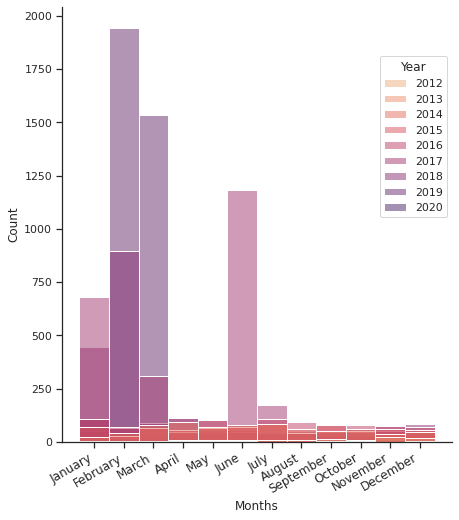

In [25]:
import seaborn as sns
import matplotlib as mpl

# mpl.use('TkAgg')
import matplotlib.pyplot as plt
import calendar
  
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    users_df,
    x=users_df['created_at'].dt.month, hue=users_df['created_at'].dt.year,
    multiple='layer',
    log_scale=False,
    discrete=True,
    palette='flare'
)

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.8, 0.9), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'right', 'fontsize': 12, 'rotation': 30})
plt.show()

In [26]:
tweets_df['user_id'].value_counts().sort_values(ascending=False)

497404180     3920
1693274954    3906
157029836     3903
164940888     3903
491630583     3902
              ... 
126216653        1
1723             1
898              1
707              1
261              1
Name: user_id, Length: 12066, dtype: int64

In [27]:
tweets_df['id'].astype(str).str.len().value_counts().sort_values(ascending=False)

18    9958804
17     171209
10     127161
11     123921
16     114232
15     113880
9      113573
8      113394
7       11449
14      11293
6        1178
13       1049
12        129
5         114
4          14
3           2
Name: id, dtype: int64

In [28]:
tweets_df['user_id'].astype(str).str.len().value_counts().sort_values(ascending=False)

9     6308892
10    3025522
8     1454375
7       52841
6       19134
3         418
4         119
2          42
5          33
1          12
20         12
11          2
Name: user_id, dtype: int64

## Indicators

1. How many tweets were published by the user?
2. How many tweets are published by the user in a given period of time?
3. Total number of tweets
4. Total number of likes and comments
5. Ratio between the number of tweets and the number of likes
6. Entropy of the user
7. Average length of the tweets per user
8. Average number of special characters in the tweets per user

GIACOMO

In [29]:
# first of all merge the two dataframe, checking lenght of df after and before merging
# so that we can assure that no rows have been discarded

users_df.rename(columns = {'id':'user_id'}, inplace = True)

print(len(tweets_df))
merged_df = tweets_df.merge(users_df,on='user_id', how='outer')
print(len(tweets_df))

10861402
10861402


In [30]:
print(merged_df.head(5))

                   id    user_id  retweet_count  reply_count  favorite_count  \
0  509354017856950336  327746321              0            0               0   
1  523891871761039360  327746321              0            0               0   
2  528202577788559360  327746321              0            0               0   
3  530119198710964160  327746321              0            0               0   
4  520435124048248832  327746321              0            0               0   

   num_hashtags  num_urls  num_mentions        created_at_x  \
0             0         0             0 2019-09-11 14:53:55   
1             0         1             0 2019-10-21 17:42:10   
2             0         0             0 2019-11-02 15:11:22   
3             0         1             0 2019-11-07 22:07:20   
4             0         1             0 2019-10-12 04:46:17   

                                                text                name lang  \
0  If man is a little lower than angels, then ang...  The A

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10861402 entries, 0 to 10861401
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   user_id         int64         
 2   retweet_count   int64         
 3   reply_count     int64         
 4   favorite_count  int64         
 5   num_hashtags    int64         
 6   num_urls        int64         
 7   num_mentions    int64         
 8   created_at_x    datetime64[ns]
 9   text            object        
 10  name            object        
 11  lang            object        
 12  bot             float64       
 13  created_at_y    datetime64[ns]
 14  statuses_count  float64       
dtypes: datetime64[ns](2), float64(2), int64(8), object(3)
memory usage: 1.3+ GB


In [32]:
nan_unique_count(merged_df, "merged_df")

# i valori unici nel campo user_id nel tweets dataframe sono 12066 mentre la lunghezza dello user_df è 11508 
# questo significa che sono presenti user_id nel dataframe tweets_df che non sono presenti nello user_df
# quando mergiamo i due dataset troviamo quindi dei NaN per gli user_id che non erano presenti nello user_df
# CHE CI FACCIAMO CON QUESTI NAN?


column: id 	unique values: 10606605
column: id 	NaN: 0
column: user_id 	unique values: 12066
column: user_id 	NaN: 0
column: retweet_count 	unique values: 45779
column: retweet_count 	NaN: 0
column: reply_count 	unique values: 593
column: reply_count 	NaN: 0
column: favorite_count 	unique values: 1480
column: favorite_count 	NaN: 0
column: num_hashtags 	unique values: 335
column: num_hashtags 	NaN: 0
column: num_urls 	unique values: 414
column: num_urls 	NaN: 0
column: num_mentions 	unique values: 424
column: num_mentions 	NaN: 0
column: created_at_x 	unique values: 8103097
column: created_at_x 	NaN: 0
column: text 	unique values: 6778478
column: text 	NaN: 0
column: name 	unique values: 11361
column: name 	NaN: 3645
column: lang 	unique values: 27
column: lang 	NaN: 693
column: bot 	unique values: 3
column: bot 	NaN: 693
column: created_at_y 	unique values: 11424
column: created_at_y 	NaN: 693
column: statuses_count 	unique values: 3837
column: statuses_count 	NaN: 43168


In [33]:
# How many tweets were published by the user?
merged_df['user_id'].value_counts().sort_values(ascending=False)

497404180     3920
1693274954    3906
157029836     3903
164940888     3903
491630583     3902
              ... 
126216653        1
1723             1
898              1
707              1
261              1
Name: user_id, Length: 12066, dtype: int64

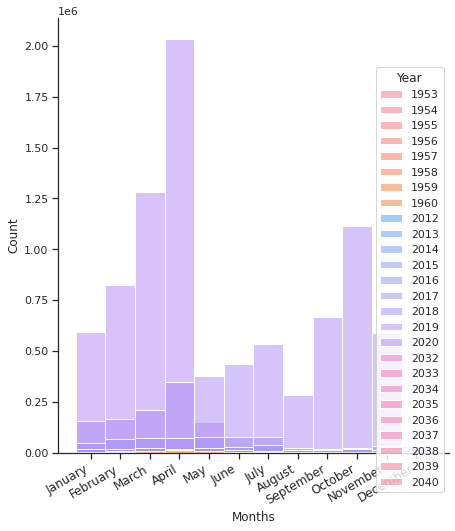

In [45]:
# How many tweets are published by the user in a given period of time?

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    merged_df,
    x=merged_df['created_at_x'].dt.month, hue=merged_df['created_at_x'].dt.year,
    multiple='layer',
    palette='husl',
    log_scale=False,
    discrete=True,
)

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.8, 0.9), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                        fontdict={'horizontalalignment': 'right', 'fontsize': 12, 'rotation': 30})
plt.show() 

## Pairwise Correlation
DA FARE

MATRICI DI CORRELAZIONE ED ENTROPIA - DENNY

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348571 entries, 7158 to 10861362
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   retweet_count   348571 non-null  int64         
 1   reply_count     348571 non-null  int64         
 2   favorite_count  348571 non-null  int64         
 3   num_hashtags    348571 non-null  int64         
 4   num_urls        348571 non-null  int64         
 5   num_mentions    348571 non-null  int64         
 6   created_at_x    348571 non-null  datetime64[ns]
 7   text            348571 non-null  object        
 8   name            348547 non-null  object        
 9   lang            348547 non-null  object        
 10  bot             348547 non-null  float64       
 11  created_at_y    348547 non-null  datetime64[ns]
 12  statuses_count  340511 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(6), object(3)
memory usage: 37.2+ MB
None


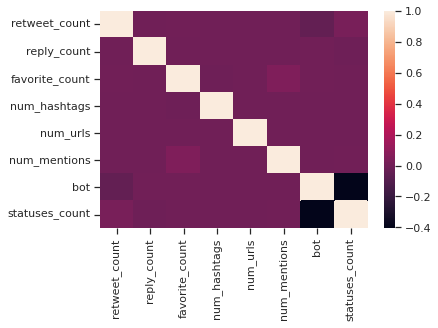

In [46]:
corr_df = merged_df[merged_df.created_at_x.dt.year == 2019]
corr_df = corr_df[corr_df.created_at_x.dt.month == 4]

corr_df = corr_df.drop(columns=['id', 'user_id'])

print(corr_df.info())
corr = corr_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## SESSO GRATIS

TUTTO QUELLO CHE È QUA SOTTO È IL MIO VECCHIO CODICE NON CANCELLARE, DA MODIFICARE E INTEGRARE CON IL NOTEBOOK

## Checking NaN and duplicates

**DA FARE **

In [ ]:
users_df["created_at"]=pd.to_datetime(users_df["created_at"], errors='coerce', yearfirst=True)

In [ ]:
users_df.describe()

,bot,statuses_count
count,11508.000000,11109.000000
mean,0.531456,5883.312359
std,0.499031,19073.007305
min,0.000000,0.000000
25%,0.000000,41.000000
50%,1.000000,68.000000
75%,1.000000,2916.000000
max,1.000000,399555.000000


In [ ]:
users_df.head(5)

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [ ]:
#print distinct value for each column of small_tweets_df
for col in small_tweets_df.columns:
  print(f"column: {col} values: {small_tweets_df[col].unique()}")

column: user_id values: ['798613004' '557639325' '270494010' ... 'lemziw' '9nzqd' '0w6']
column: retweet_count values: ['1' '0' '5' ... '7brv' 'd2f' '093b13axt']
column: reply_count values: ['0' 'v4ec' '0.0' ... 'nmwx' '4iw8cgyi1' 'iptj9']
column: favorite_count values: ['0' '1' '2' ... '0im' 't30k' 'o8h75gi']
column: num_hashtags values: ['0' '7' '1' ... 'f2qpm' 'nb10m' 'u40']
column: num_urls values: ['0' '1' nan ... 'j7gm8ml1a' 'fhc' '4zqi4']
column: num_mentions values: ['1' '0' '2' ... 'ttprcxgpup' 'tfgf7m5' '3f6nithk']
column: created_at values: ['2020-04-23 10:35:21' '2020-01-31 11:17:16' '2017-03-04 10:37:42' ...
 '2019-09-25 18:35:01' '2014-06-12 19:49:08' '2019-06-22 16:39:58']
column: text values: ['All the best on your bdy bro @zakijufri' 'Quirino ltr. :)'
 'Hahaha word ik opgebeld voor zorgtoestag.nl waar ik me eerst ingescreven had, ja gegevens weggevallen dit dat. Ik zei uuhm heb ik zelf al'
 ... 'SUMMER? BRING IT ON!' '@TheGrillingDad ahh'
 '@MsDeeCM they are cooler :)'

In [ ]:
#print distinct value for each column of users_df
for col in users_df.columns:
  print(f"column: {col} values: {users_df[col].unique()}")

column: name values: ['Lamonica Raborn' 'Lourie Botton' 'Dadan Syarifudin' ...
 'ALMA LETICIA NUÑO ' 'Minnie Guadagno' 'Corvanna ']
column: lang values: ['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-AU' 'da' 'ar' 'en-GB' 'Select Language...' 'zh-TW' 'zh-cn' 'pl'
 'el' 'fil' 'sv' 'xx-lc']
column: bot values: [1 0]
column: created_at values: ['2019-02-22T18:00:42.000000000' '2019-02-26T03:02:32.000000000'
 '2015-04-30T07:09:56.000000000' ... '2015-03-29T17:01:24.000000000'
 '2019-03-13T02:44:13.000000000' '2017-11-09T23:24:16.000000000']
column: statuses_count values: [7.6000e+01 5.4000e+01 3.0000e+00 ... 1.1688e+04 3.0240e+03 5.2790e+03]


In [ ]:
# covert small_tweets_df columns from object to numeric. If a value can't be converted to integer
# a NaN is inserted

columns = ["user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

#counting the number of nan
for col in columns:
 small_tweets_df[col]=pd.to_numeric(small_tweets_df[col], errors='coerce', downcast='integer')

In [ ]:
for col in small_tweets_df.columns:
  print(f"column: {col} NaN: {small_tweets_df[col].isna().sum()}")

column: user_id NaN: 86461
column: retweet_count NaN: 125302
column: reply_count NaN: 162647
column: favorite_count NaN: 161864
column: num_hashtags NaN: 232913
column: num_urls NaN: 161712
column: num_mentions NaN: 197282
column: created_at NaN: 0
column: text NaN: 107558


In [ ]:
#drop rows with nan values. If any of the value of a row is a nan, the entire row is dropped
small_tweets_df_nona = small_tweets_df.dropna(inplace=False)
#counting the number of nan
for col in small_tweets_df_nona.columns:
  print(f"column: {col} NaN: {small_tweets_df_nona[col].isna().sum()}")

column: user_id NaN: 0
column: retweet_count NaN: 0
column: reply_count NaN: 0
column: favorite_count NaN: 0
column: num_hashtags NaN: 0
column: num_urls NaN: 0
column: num_mentions NaN: 0
column: created_at NaN: 0
column: text NaN: 0


In [ ]:
small_tweets_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2355606 entries, 590826213754556417 to 591541311523590145
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         float64
 1   retweet_count   float64
 2   reply_count     float64
 3   favorite_count  float64
 4   num_hashtags    float64
 5   num_urls        float64
 6   num_mentions    float64
 7   created_at      object 
 8   text            object 
dtypes: float64(7), object(2)
memory usage: 179.7+ MB


In [ ]:
small_tweets_df_nona = small_tweets_df_nona.astype({
"user_id":int, "retweet_count":int, "reply_count":int,
           "favorite_count":int, "num_hashtags":int,  "num_urls":int, "num_mentions":int    
}, errors="ignore")

In [ ]:
small_tweets_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2355606 entries, 590826213754556417 to 591541311523590145
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   retweet_count   int64 
 2   reply_count     int64 
 3   favorite_count  int64 
 4   num_hashtags    int64 
 5   num_urls        int64 
 6   num_mentions    int64 
 7   created_at      object
 8   text            object
dtypes: int64(7), object(2)
memory usage: 179.7+ MB


In [ ]:
small_tweets_df_nona.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06,2.355606e+06
mean,8.292123e+08,5.680416e+02,2.256914e-02,2.973501e+03,-3.915499e+12,1.509299e+03,5.409270e-01
std,8.517246e+08,1.401362e+04,1.089636e+01,4.560860e+06,6.009501e+15,2.280710e+06,9.486533e+00
min,5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-9.223372e+18,0.000000e+00,0.000000e+00
25%,2.312573e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.680718e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.223670e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.164942e+09,3.350111e+06,1.124200e+04,7.000000e+09,4.000000e+09,3.500000e+09,9.818000e+03


In [ ]:
small_tweets_df_nona.head(10)

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
590826213754556417,798613004,1,0,0,0,0,1,2020-04-23 10:35:21,All the best on your bdy bro @zakijufri
560758570732367872,557639325,0,0,0,0,0,0,2020-01-31 11:17:16,Quirino ltr. :)
175530312707751936,270494010,0,0,0,0,0,0,2017-03-04 10:37:42,Hahaha word ik opgebeld voor zorgtoestag.nl wa...
583758388913446912,1088449490,5,0,0,0,0,1,2020-04-03 22:30:20,"RT @ProyectoMagcon: Grupo 5: ""I won't let you ..."
467837272826466305,15324749,0,0,0,0,0,1,2019-05-20 01:21:12,@sarabeee correct.
454335875556470784,385121466,1,0,0,0,0,1,2019-04-12 19:11:28,@___shortfordays thanks for the follow don't b...
583749852950953984,3018260990,0,0,1,0,0,1,2020-04-03 21:56:25,"@Bexofeasttex It was her smell too, like sulph..."
583188740039917568,1492569428,0,0,0,0,0,1,2020-04-02 08:46:45,@fxckthisshit_ i know babe xx
174771895927980032,41825429,1,0,0,0,1,2,2017-03-02 08:24:01,@urNaughtyAngel @pleasurechestla no but here ...


In [ ]:
small_tweets_df_nona["user_id"].value_counts()

157029836     968
491630583     968
1712224658    959
486172124     950
161634919     931
             ... 
277203011       1
1175901596      1
2897127823      1
67041122        1
1174944751      1
Name: user_id, Length: 11304, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4f87ea5b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f87beffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4f87ead350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4f87bf3f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f87bf36d0>],
 'means': []}

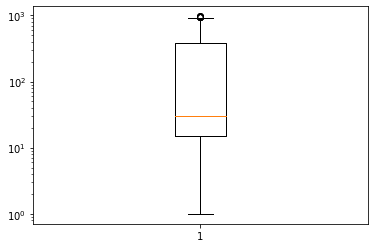

In [ ]:
plt.yscale("log")
plt.boxplot(small_tweets_df_nona["user_id"].value_counts())

In [ ]:
#drop rows with nan values. If any of the value of a row is a nan, the entire row is dropped
users_df_nona = users_df.dropna(inplace=False)

users_df_nona["lang"].value_counts()

en                    9590
it                     906
es                     306
pt                      62
en-gb                   50
ru                      40
fr                      35
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
zh-TW                    3
da                       2
Select Language...       2
ar                       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

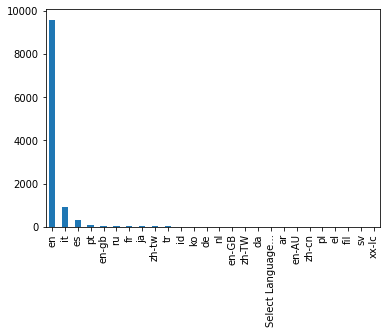

In [ ]:
users_df_nona["lang"].value_counts().plot.bar()

In [ ]:
users_df_nona['month_year'] = users_df_nona['created_at'].dt.to_period('M')
print(users_df_nona['month_year'])

id
2353593986    2019-02
2358850842    2019-02
137959629     2015-04
466124818     2017-01
2571493866    2019-06
               ...   
2911861962    2019-11
1378532629    2018-04
126984069     2015-03
2383025796    2019-03
933183398     2017-11
Name: month_year, Length: 11108, dtype: period[M]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


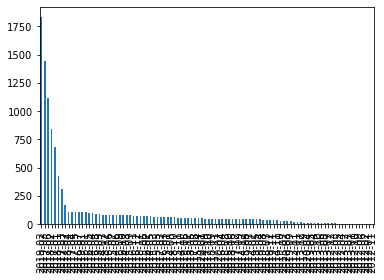

In [ ]:
users_df_nona["month_year"].value_counts().plot.bar()